# Calcul symbolique en Python


In [6]:
%matplotlib inline

## Introduction

Ce notebook est la traduction française du cours sur SymPy disponible entre autre sur [Wakari](www.wakari.io) avec quelques modifications et compléments notamment pour la résolution d'équations différentielles. Il a pour but de permettre aux étudiants de différents niveaux d'expérimenter des notions mathématiques en leur fournissant une base de code qu'ils peuvent modifier.

[SymPy](http://sympy.org/en/index.html) - est un module Python qui peut être utilisé dans un programme Python ou dans une session IPython. Il fournit de puissantes fonctionnalités de calcul symbolique.

Pour commencer à utiliser SymPy dans un programme ou un notebook Python, importer le module `sympy`:

In [4]:
from sympy import *

Pour obtenir des sorties mathématiques formatées $\LaTeX$ :

In [8]:
from sympy import init_printing
init_printing(use_latex=True)

## Variables symboliques

Dans SymPy on a besoin de créer des symboles pour les variables qu'on souhaite employer. Pour cela on utilise la class `Symbol`:

In [9]:
x = Symbol('x')

In [10]:
(pi + x)**2

In [11]:
# manière alternative de définir plusieurs symboles en une seule instruction
a, b, c = symbols("a, b, c")

On peut ajouter des contraintes sur les symboles lors de leur création :

In [12]:
x = Symbol('x', real=True)

In [13]:
x.is_imaginary

False

In [6]:
x = Symbol('x', positive=True)

In [15]:
x > 0

### Nombres complexes

L'unité imaginaire est notée `I` dans Sympy. 

In [16]:
1+1*I

In [17]:
I**2

In [18]:
(1 + x * I)**2

### Nombres rationnels

Il y a trois types numériques différents dans SymPy : `Real` (réel), `Rational` (rationnel), `Integer` (entier) : 

In [19]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [20]:
r1

In [21]:
r1+r2

In [22]:
r1/r2

### Evaluation numérique

SymPy permet une précision arbitraire des évaluations numériques et fournit des expressions pour quelques constantes comme : `pi`, `E`, `oo` pour l'infini.

Pour évaluer numériquement une expression nous utilisons la fonction `evalf` (ou `N`). Elle prend un argument `n` qui spécifie le nombre de chiffres significatifs.

In [23]:
pi.evalf(n=50)

In [24]:
E.evalf(n=4)

In [25]:
y = (x + pi)**2

In [26]:
N(y, 5) # raccourci pour evalf

Quand on évalue des expressions algébriques on souhaite souvent substituer un symbole par une valeur numérique. Dans SymPy cela s'effectue par la fonction `subs` :

In [27]:
y.subs(x, 1.5)

In [28]:
N(y.subs(x, 1.5))

La fonction `subs` permet de substituer aussi des symboles et des expressions :

In [29]:
y.subs(x, a+pi)

On peut aussi combiner l'évolution d'expressions avec les tableaux de NumPy (pour tracer une fonction par ex) :

In [2]:
import numpy

In [7]:
x_vec = numpy.arange(0, 10, 0.1)
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

0.0

In [32]:
import matplotlib.pyplot as plt

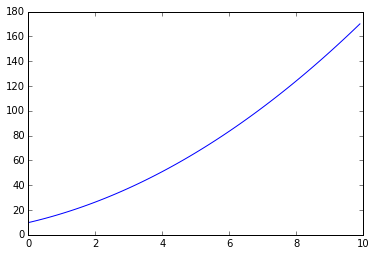

In [33]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);

## Manipulations algébriques

Une des principales utilisations d'un système de calcul symbolique est d'effectuer des manipulations algébriques d'expression. Il est possible de développer un produit ou bien de factoriser une expression. Les fonctions pour réaliser ces opérations de bases figurent dans les exemples des sections suivantes.

### Développer et factoriser

Les premiers pas dans la manipulation algébrique

In [34]:
(x+1)*(x+2)*(x+3)

In [35]:
expand((x+1)*(x+2)*(x+3))

La fonction `expand` (développer) prend des mots clés en arguments pour indiquer le type de développement à réaliser. Par exemple pour développer une expression trigonomètrique on utilise l'argument `trig=True` :

In [36]:
sin(a+b)

In [37]:
expand(sin(a+b), trig=True)

In [38]:
sin(a+b)**3

In [39]:
expand(sin(a+b)**3, trig=True)

Lancer `help(expand)` pour une explication détaillée des différents types de développements disponibles.

L'opération opposée au développement est bien sur la factorisation qui s'effectue grâce à la fonction `factor` :

In [40]:
factor(x**3 + 6 * x**2 + 11*x + 6)

In [41]:
x1, x2 = symbols("x1, x2")

In [42]:
factor(x1**2*x2 + 3*x1*x2 + x1*x2**2)

### Simplify

The `simplify` tries to simplify an expression into a nice looking expression, using various techniques. More specific alternatives to the `simplify` functions also exists: `trigsimp`, `powsimp`, `logcombine`, etc. 

The basic usages of these functions are as follows:

In [43]:
# simplify expands a product
simplify((x+1)*(x+2)*(x+3))

In [44]:
# simplify uses trigonometric identities
simplify(sin(a)**2 + cos(a)**2)

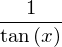

In [45]:
simplify(cos(x)/sin(x))

simplify permet aussi de tester l'égalité d'expressions :

In [46]:
exp1 = sin(a+b)**3
exp2 = sin(a)**3*cos(b)**3 + 3*sin(a)**2*sin(b)*cos(a)*cos(b)**2 + 3*sin(a)*sin(b)**2*cos(a)**2*cos(b) + sin(b)**3*cos(a)**3
simplify(exp1 - exp2)

In [47]:
if simplify(exp1 - exp2) == 0:
    print "{0} = {1}".format(exp1, exp2)
else:
    print "exp1 et exp2 sont différentes"

sin(a + b)**3 = sin(a)**3*cos(b)**3 + 3*sin(a)**2*sin(b)*cos(a)*cos(b)**2 + 3*sin(a)*sin(b)**2*cos(a)**2*cos(b) + sin(b)**3*cos(a)**3


## apart and together

Pour manipuler des expressions numériques de fractions on dispose des fonctions `apart` and `together` :

In [48]:
f1 = 1/((a+1)*(a+2))

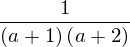

In [49]:
f1

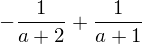

In [50]:
apart(f1)

In [51]:
f2 = 1/(a+2) + 1/(a+3)

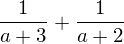

In [52]:
f2

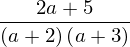

In [53]:
together(f2)

Simplify combine les fractions mais ne factorise pas : 

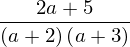

In [54]:
simplify(f2)

## Calcul

En plus des manipulations algébriques, l'autre grande utilisation d'un système de calcul symbolique et d'effectuer des calculs comme des dérivées et intégrales d'expressions algébriques.

### Dérivation

La dérivation est habituellement simple. On utilise la fonction  `diff` avec pour premier argument l'expression à dériver et comme second le symbole de la variable suivant laquelle dériver :

In [55]:
y

Dérivée première

In [56]:
diff(y**2, x)

Pour des dérivées d'ordre supérieur :

In [57]:
diff(y**2, x, x) # dérivée seconde

In [58]:
diff(y**2, x, 2) # dérivée seconde avec une autre syntaxe

Pour calculer la dérivée d'une expression à plusieurs variables :

In [59]:
x, y, z = symbols("x,y,z")

In [60]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [61]:
diff(f, x, 1, y, 2)

### Integration

L'intégration est réalisée de manière similaire :

In [62]:
f

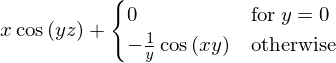

In [63]:
integrate(f, x)

En fournissant des limites pour la variable d'intégration on peut évaluer des intégrales définies :

In [64]:
integrate(f, (x, -1, 1))

et aussi des intégrales impropres pour lesquelles on ne connait pas de primitive

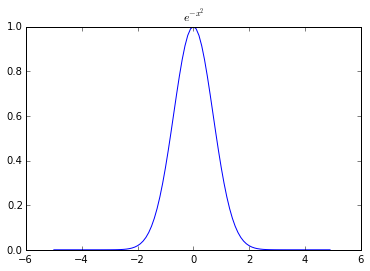

In [65]:
x_i = numpy.arange(-5, 5, 0.1)
y_i = numpy.array([N((exp(-x**2)).subs(x, xx)) for xx in x_i])
fig2, ax2 = plt.subplots()
ax2.plot(x_i, y_i)
ax2.set_title("$e^{-x^2}$")

In [66]:
integrate(exp(-x**2), (x, -oo, oo))

Rappel, `oo` est la notation SymPy pour l'infini.

### Sommes et produits

On peut évaluer les sommes et produits d'expression avec les fonctions `Sum` et `Product` :

In [67]:
n = Symbol("n")

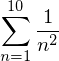

In [68]:
Sum(1/n**2, (n, 1, 10))

In [69]:
Sum(1/n**2, (n,1, 10)).evalf()

In [70]:
Sum(1/n**2, (n, 1, oo)).evalf()

In [71]:
N(pi**2/6) # fonction zeta(2) de Riemann

Les produits sont calculés de manière très semblables :

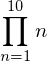

In [72]:
Product(n, (n, 1, 10)) # 10!

### Limites

Les limites sont évaluées par la fonction `limit`. Par exemple : 

In [73]:
limit(sin(x)/x, x, 0)

On peut changer la direction d'approche du point limite par l'argument du mot clé `dir` :

In [74]:
limit(1/x, x, 0, dir="+")

In [75]:
limit(1/x, x, 0, dir="-")

### Séries

Le développement en série est une autre fonctionnalité très utile d'un système de calcul symbolique. Dans SymPy on réalise les développements en série grâce à la fonction `series` :

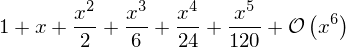

In [76]:
series(exp(x), x)

Par défaut le développement de l'expression s'effectue au voisinage de $x=0$, mais on peut développer la série au voisinage de toute autre valeur de $x$ en incluant explicitement cette valeur lors de l'appel à la fonction :

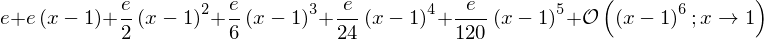

In [77]:
series(exp(x), x, 1)

Et on peut explicitement définir jusqu'à quel ordre le développement doit être mené :

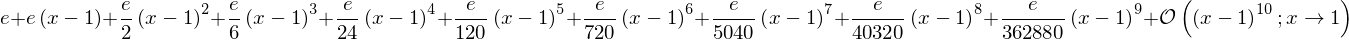

In [78]:
series(exp(x), x, 1, 10)

Le développement en séries inclue l'ordre d'approximation. Ceci permet de gérer l'ordre du résultat de calculs utilisant des développements en séries d'ordres différents :

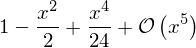

In [79]:
s1 = cos(x).series(x, 0, 5)
s1

In [80]:
s2 = sin(x).series(x, 0, 2)
s2

In [81]:
expand(s1 * s2)

Si on ne souhaite pas afficher l'ordre on utilise la méthode `removeO` :

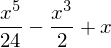

In [82]:
expand(s1.removeO() * s2.removeO())

Mais cela conduit à des résultats incorrects pour des calculs avec plusieurs développements :

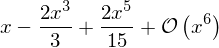

In [83]:
(cos(x)*sin(x)).series(x, 0, 6)

### Plus sur les séries

* https://fr.wikipedia.org/wiki/D%C3%A9veloppement_limit%C3%A9 - Article de Wikipedia.

## Algèbre linéaire

### Matrices

Les matrices sont définies par la classe `Matrix` :

In [84]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

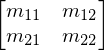

In [85]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [86]:
b = Matrix([[b1], [b2]])
b

Avec les instances de la classe `Matrix` on peut faire les opérations algébriques classiques :

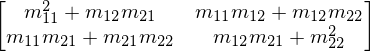

In [87]:
A**2

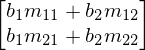

In [88]:
A * b

Et calculer les déterminants et inverses :

In [89]:
A.det()

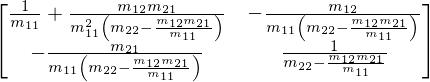

In [90]:
A.inv()

## Résolution d'équations

Pour résoudre des équations et des systèmes d'équations on utilise la fonction `solve` :

In [91]:
solve(x**2 - 1, x)

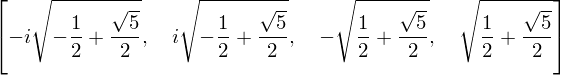

In [92]:
solve(x**4 - x**2 - 1, x)

In [93]:
expand((x-1)*(x-2)*(x-3)*(x-4)*(x-5))

In [94]:
solve(x**5 - 15*x**4 + 85*x**3 - 225*x**2 + 274*x - 120, x)

Système d'équations :

In [95]:
solve([x + y - 1, x - y - 1], [x,y])

En termes d'autres expressions symboliques :

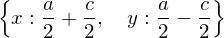

In [96]:
solve([x + y - a, x - y - c], [x,y])

## Résolution d'équations différentielles

Pour résoudre des équations diférentielles et des systèmes d'équations différentielles on utilise la fonction `dsolve` :

In [97]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x

Exemple d'équation différentielle du 2e ordre

In [98]:
f = Function('f')
dsolve(Derivative(f(x), x, x) + 9*f(x), f(x))

In [99]:
dsolve(diff(f(x), x, 2) + 9*f(x), f(x), hint='default', ics={f(0):0, f(1):10})

In [141]:
# Essai de récupération de la valeur de la constante C1 quand une condition initiale est fournie
eqg = Symbol("eqg")
g = Function('g')
eqg = dsolve(Derivative(g(x), x) + g(x), g(x), ics={g(2): 50})
eqg

In [144]:
print "g(x) est de la forme {}".format(eqg.rhs)

g(x) est de la forme C1*exp(-x)


In [129]:
# recherche manuelle de la valeur de c1 qui vérifie la condition initiale
c1 = Symbol("c1")
c1 = solve(Eq(c1*E**(-2),50), c1)
print c1

[50*exp(2)]


SymPy ne sait pas résoudre cette equation différentielle non linéaire avec $h(x)^2$ :

In [112]:
h = Function('h')
try:
    dsolve(Derivative(h(x), x) + 0.001*h(x)**2 - 10, h(x))
except:
    print "une erreur s'est produite"

une erreur s'est produite


On peut résoudre cette équation différentielle avec une méthode numérique fournie par la fonction `odeint` de SciPy :
## Méthode numérique pour équations différentielles (non SymPy)

vitesse finale : 88.4 m/s soit 318 km/h


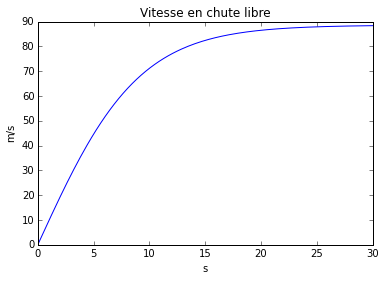

In [110]:
from scipy.integrate import odeint

def dv_dt(vec, t, k, m, g):
    z, v = vec[0], vec[1]
    dz = -v
    dv = -k/m*v**2 + g
    return [dz, dv]

vec0 = [0, 0] # conditions initiales [altitude, vitesse]
t_si = numpy.linspace (0, 30 ,150) # de 0 à 30 s, 150 points
k = 0.1 # coefficient aérodynamique
m = 80 # masse (kg)
g = 9.81 # accélération pesanteur (m/s/s)
v_si = odeint(dv_dt, vec0, t_si, args=(k, m, g))

print "vitesse finale : {0:.1f} m/s soit {1:.0f} km/h".format(v_si[-1, 1], v_si[-1, 1] * 3.6)

fig_si, ax_si = plt.subplots()
ax_si.set_title("Vitesse en chute libre")
ax_si.set_xlabel("s")
ax_si.set_ylabel("m/s")
ax_si.plot(t_si, v_si[:,1], 'b')

## Pour aller plus loin

* http://sympy.org/fr/index.html - La page web de SymPy.
* https://github.com/sympy/sympy - Le code source de SymPy.
* http://live.sympy.org - Version en ligne de SymPy pour des tests et des démonstrations.
